In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bench = BenchmarkSet("nb301", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

Please make sure to also cite:
Siems, J., Zimmer, L., Zela, A., Lukasik, J., Keuper, M., & Hutter, F. (2020). NAS-Bench-301 and the Case for Surrogate Benchmarks for Neural Architecture Search. arXiv preprint arXiv:2008.09777, 11.
Zimmer, L. (2020). nasbench301_full_data. figshare. Dataset. https://doi.org/10.6084/m9.figshare.13286105.v1, Apache License, Version 2.0.


In [7]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [8]:
def harmonize_dtypes(df1, df2):
    common_columns = df1.columns.intersection(df2.columns)
    
    for col in common_columns:
        if df1[col].dtype != df2[col].dtype:
            try:
                df2[col] = df2[col].astype(df1[col].dtype)
                #print(f"Converted {col} in df2 to {df1[col].dtype}")
            except ValueError:
                try:
                    df1[col] = df1[col].astype(df2[col].dtype)
                    #print(f"Converted {col} in df1 to {df2[col].dtype}")
                except ValueError:
                    print(f"Failed to convert {col}")

def plot_true_lc(ccs, target, dat):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        config = pd.DataFrame(data=x, index=[0])
        harmonize_dtypes(tmp, config)
        config.drop(fidelity_params, axis=1, inplace=True)
        pdf = dat.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(
            pdf[bench.config.fidelity_params[0]],
            pdf[target],
            color=colors[i],
            marker="o",
            linestyle="None",
            alpha=0.5,
        )

In [9]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]
    for i, cc in enumerate(ccs):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        if bench.config.config_id != "nb301":
            x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # (ranger.)replace and (svm.)shrinking must be converted to str
        if "ranger.replace" in x.keys():
            if x["ranger.replace"]:
                x["ranger.replace"] = "TRUE"
            else:
                x["ranger.replace"] = "FALSE"
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "svm.shrinking" in x.keys():
            if x["svm.shrinking"]:
                x["svm.shrinking"] = "TRUE"
            else:
                x["svm.shrinking"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color=colors[i])

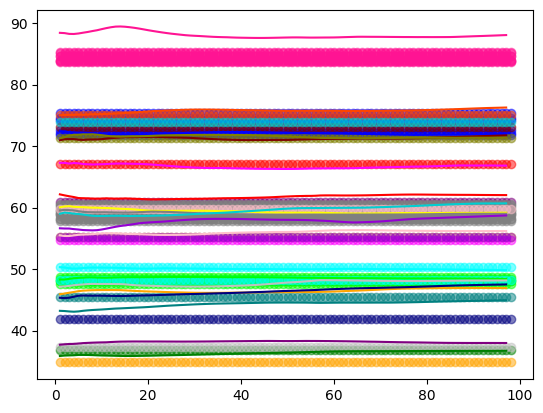

In [10]:
# Draw a sample configuration
#tmp = df[df["OpenML_task_id"] == 189873]
#tmp = df[(df["task_id"] == 375) & (df["learner_id"] == "svm") & (df["repl"] == 10)]
tmp = df
ccs = [tmp.sample(1).to_dict() for i in range(20)]
target = "runtime_increase"
#target = "val_accuracy"
#fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
fidelity_sequence = range(1, 99)
plot_true_lc(ccs, target=target, dat=tmp)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [14]:
ccs

[{'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_0': {337418: 'sep_conv_3x3'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_1': {337418: 'sep_conv_3x3'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_2': {337418: 'max_pool_3x3'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_3': {337418: 'sep_conv_5x5'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_4': {337418: nan},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_5': {337418: 'sep_conv_3x3'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_6': {337418: nan},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_7': {337418: 'sep_conv_3x3'},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_8': {337418: nan},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_9': {337418: nan},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_10': {337418: nan},
  'NetworkSelectorDatasetInfo_COLON_darts_COLON_edge_normal_11':

In [15]:
bench = BenchmarkSet("nb301", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "val_accuracy"

Please make sure to also cite:
Siems, J., Zimmer, L., Zela, A., Lukasik, J., Keuper, M., & Hutter, F. (2020). NAS-Bench-301 and the Case for Surrogate Benchmarks for Neural Architecture Search. arXiv preprint arXiv:2008.09777, 11.
Zimmer, L. (2020). nasbench301_full_data. figshare. Dataset. https://doi.org/10.6084/m9.figshare.13286105.v1, Apache License, Version 2.0.
False
/home/lps/Phd/yahpo_data/nb301/model_v2.onnx


In [19]:
def plot_lc_noisy(cc, target, fidelity_sequence, fixed_seed = True):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FF00FF",
        "#00FFFF",
        "#FFA500",
        "#800080",
        "#008000",
        "#000080",
        "#800000",
        "#008080",
        "#808000",
        "#808080",
        "#C0C0C0",
        "#FFC0CB",
        "#FF4500",
        "#00CED1",
        "#FF1493",
        "#9400D3",
    ]

    for i in range(len(colors)):
        x = {
            k: list(cc[k].values())[0]
            for k in bench.config_space.get_hyperparameter_names()
        }
        if bench.config.config_id != "nb301":
            x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # (ranger.)replace and (svm.)shrinking must be converted to str
        if "ranger.replace" in x.keys():
            if x["ranger.replace"]:
                x["ranger.replace"] = "TRUE"
            else:
                x["ranger.replace"] = "FALSE"
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "svm.shrinking" in x.keys():
            if x["svm.shrinking"]:
                x["svm.shrinking"] = "TRUE"
            else:
                x["svm.shrinking"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]
        if fixed_seed:
            res = bench.objective_function(out, seed=i)
            res = [x[target] for x in res]
        else:
            res = [bench.objective_function(x, seed=np.random.randint(0, 9999))[0][target] for x in out]
        plt.plot(fidelity_sequence, res, color=colors[i])

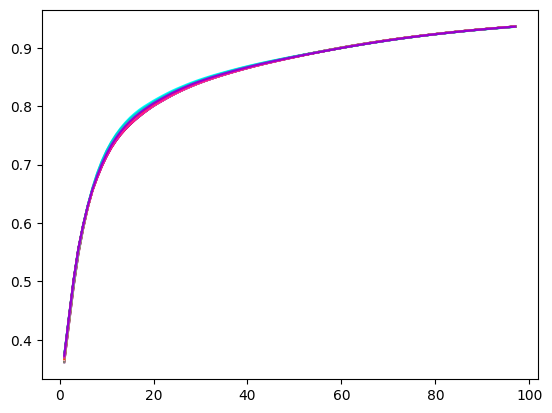

In [20]:
plot_lc_noisy(ccs[0], target, fidelity_sequence)

In [21]:
bench = BenchmarkSet("nb301", active_session=False, check=False, noisy=True)
bench._get_model_path()

Please make sure to also cite:
Siems, J., Zimmer, L., Zela, A., Lukasik, J., Keuper, M., & Hutter, F. (2020). NAS-Bench-301 and the Case for Surrogate Benchmarks for Neural Architecture Search. arXiv preprint arXiv:2008.09777, 11.
Zimmer, L. (2020). nasbench301_full_data. figshare. Dataset. https://doi.org/10.6084/m9.figshare.13286105.v1, Apache License, Version 2.0.


'/home/lps/Phd/yahpo_data/nb301/model_v2_noisy.onnx'

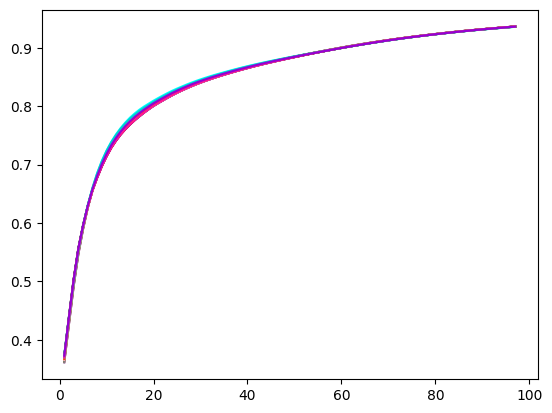

In [23]:
plot_lc_noisy(ccs[0], target, fidelity_sequence, fixed_seed=True)

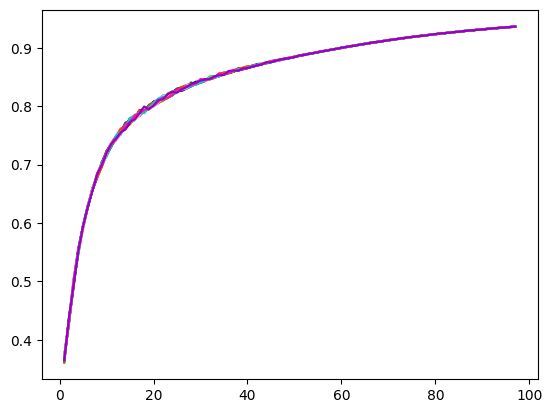

In [22]:
plot_lc_noisy(ccs[0], target, fidelity_sequence, fixed_seed=False)